# Add Thư Viện

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
import random
from scipy.spatial.distance import cdist

import seaborn as sns
%matplotlib inline



# Load CVS

In [3]:
df = pd.read_csv('income_spend.csv')
X = df.iloc[:].values

# In Head

In [4]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


# Hàm Tính WSS

In [5]:
#tính tổng khoảng cách từ các điểm đến centers 
def function_WSS(X, centers_):
    return sum(np.min(cdist(X,centers_, 'euclidean'), axis=1)**2)



# Gắn WSS

In [6]:
wss  ={}
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    
    kmeans.fit(X) 
    
    wss[i]=function_WSS(X,kmeans.cluster_centers_)


D:\AI\envs\ai_class\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\AI\envs\ai_class\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\AI\envs\ai_class\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\AI\envs\ai_class\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\AI\envs\ai_class\lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

# Vẽ Đường Elbow

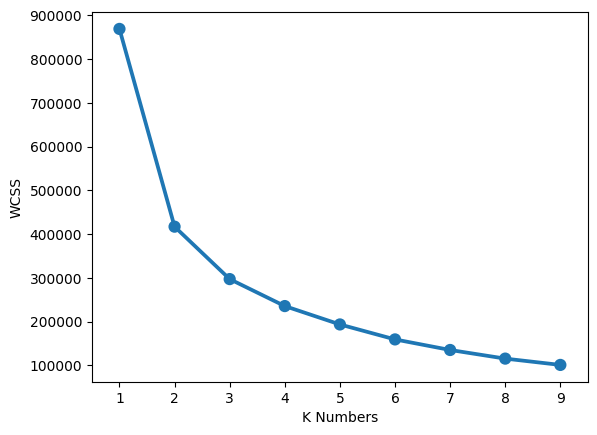

In [7]:

sns.pointplot(x = list(wss.keys()), y = list(wss.values()))

plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

# k = 6 

In [8]:
kmeans = KMeans(n_clusters = 6, init = "k-means++", random_state = 42)
y_train = kmeans.fit_predict(X)

D:\AI\envs\ai_class\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


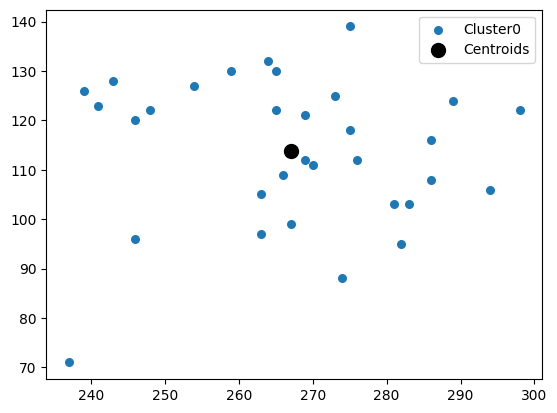

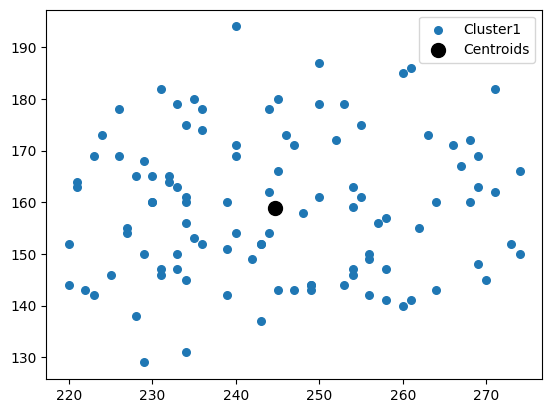

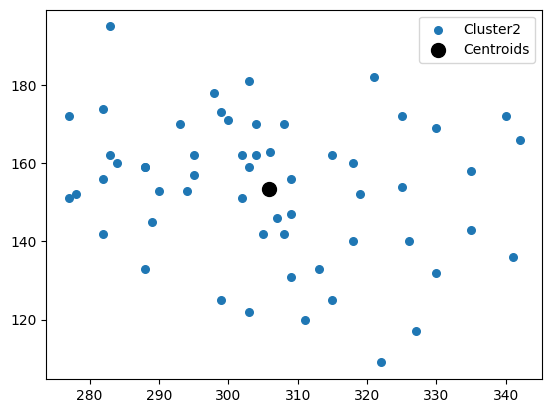

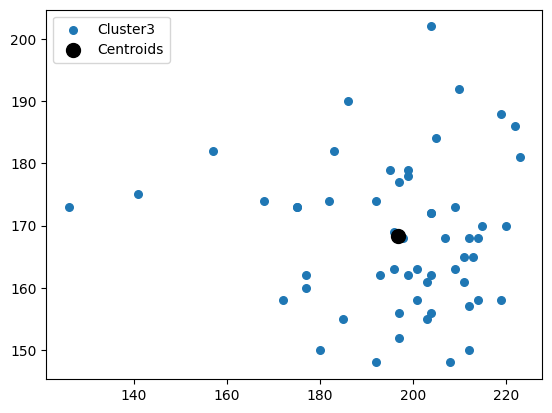

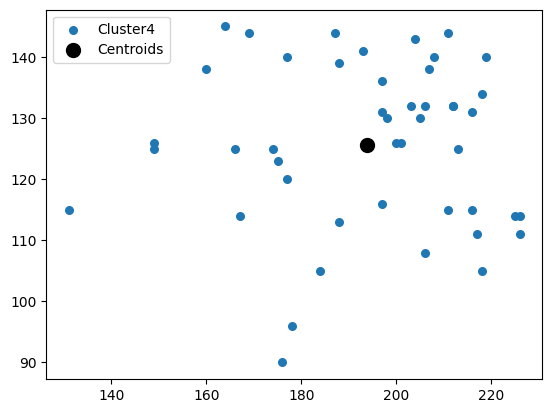

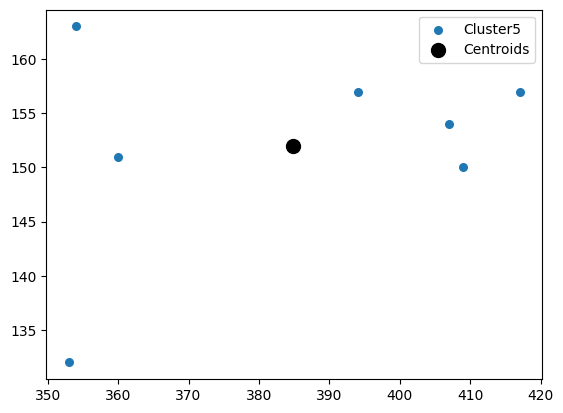

In [9]:
unique_lb = np.unique(y_train)
for i in unique_lb:
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], s = 30, label = f'Cluster{i}')
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], s = 100, c = 'black', label = 'Centroids')
    
    plt.legend()
    plt.show()  


# Vẽ Toàn Bộ Điểm

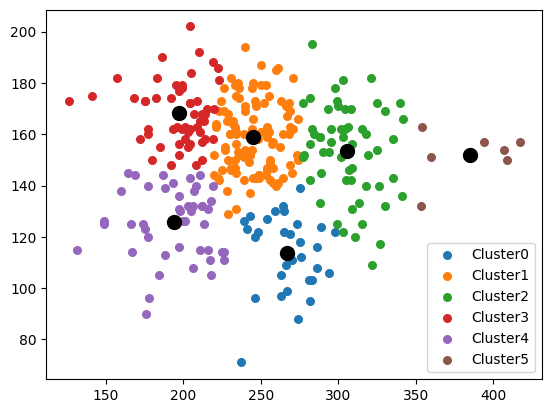

In [10]:
unique_lb = np.unique(y_train)
for i in unique_lb:
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], s = 30, label = f'Cluster{i}')

plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

# Nhận Xét Về K = 6
    + về Khoảng cách của 2 cụm thì đã có khoảng cách ổn
    + về khoảng cách trong cụm thì đồng đều ko xa quá 

# K = 4

In [11]:
kmeans_4 = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_train_4 = kmeans_4.fit_predict(X)

D:\AI\envs\ai_class\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 2 3]


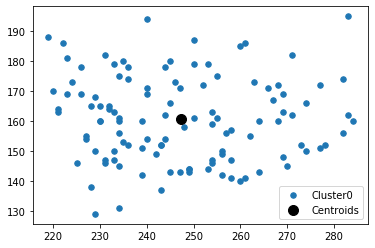

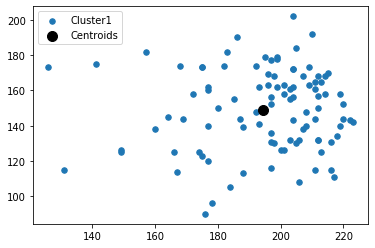

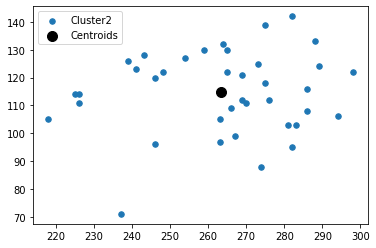

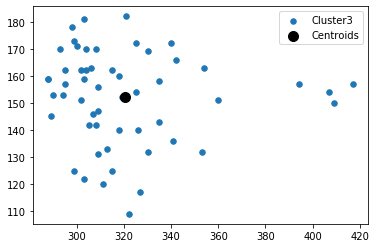

In [11]:
unique_lb_4 = np.unique(y_train_4)
print(unique_lb_4)
for i in unique_lb_4:
    plt.scatter(X[y_train_4 == i, 0], X[y_train_4 == i, 1], s = 30, label = f'Cluster{i}')
    plt.scatter(kmeans_4.cluster_centers_[i, 0], kmeans_4.cluster_centers_[i, 1], s = 100, c = 'black', label = 'Centroids')
    
    plt.legend()
    plt.show()  


# Vẽ Toàn Bộ Điểm

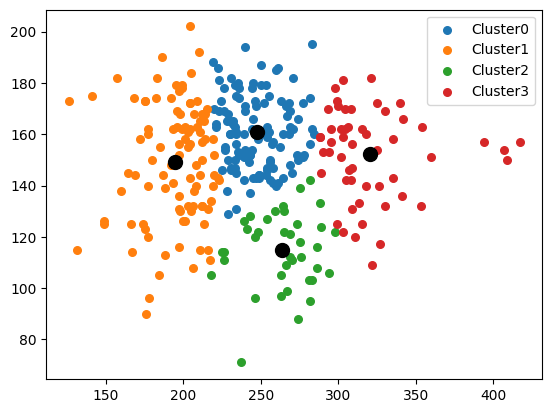

In [12]:
unique_lb_4 = np.unique(y_train_4)
for i in unique_lb_4:
    plt.scatter(X[y_train_4 == i, 0], X[y_train_4 == i, 1], s = 30, label = f'Cluster{i}')

plt.legend()
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

# Nhận Xét Về K = 4
    + về Khoảng cách của 2 cụm thì đã có khoảng cách gần nhau
    + về khoảng cách trong cụm thì đồ không đồng bộ ở cluster 3 có 1 số hạt quá Xa
    

# Nên K = 6 tối ưu hơn K =4

# Tìm Điểm Xa Nhất Và Vẽ Cho Từng bộ cluster

In [13]:
def distance(X,Y):
    return abs(((Y[0]-X[0])**2+ (Y[1] - X[1])**2)**0.5)

[237  71]


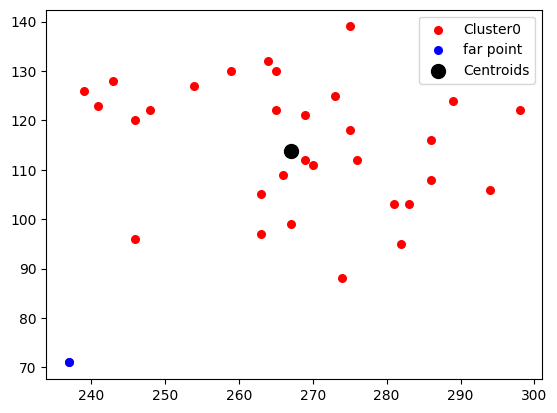

[240 194]


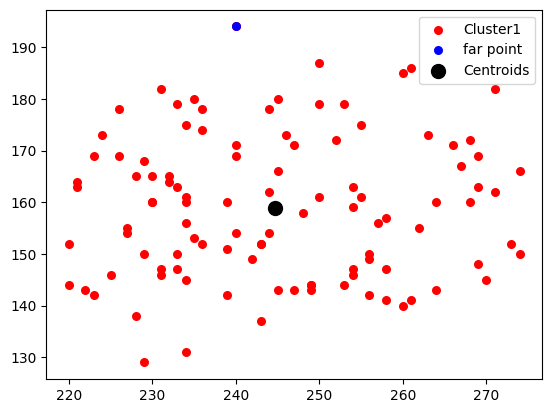

[283 195]


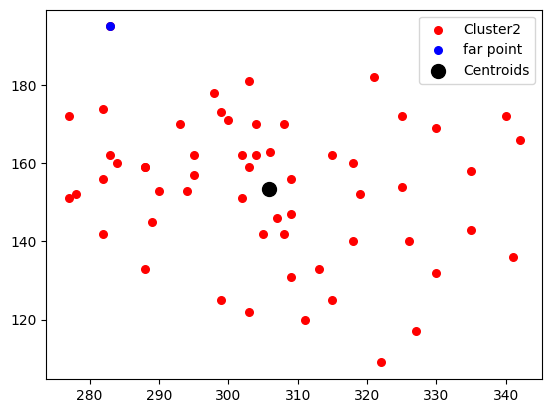

[126 173]


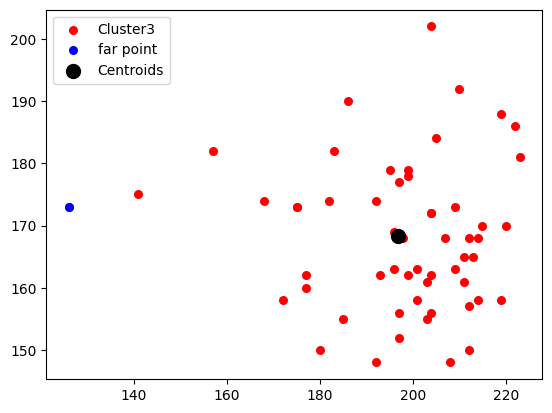

[131 115]


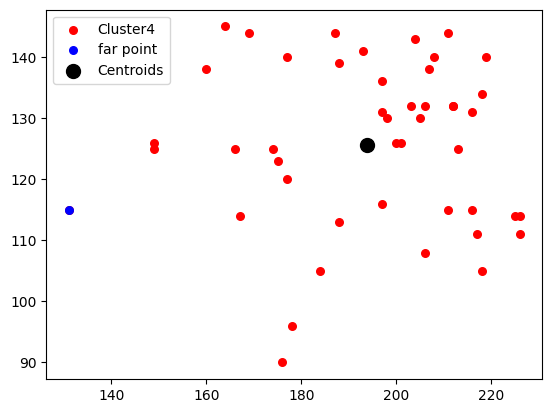

[353 132]


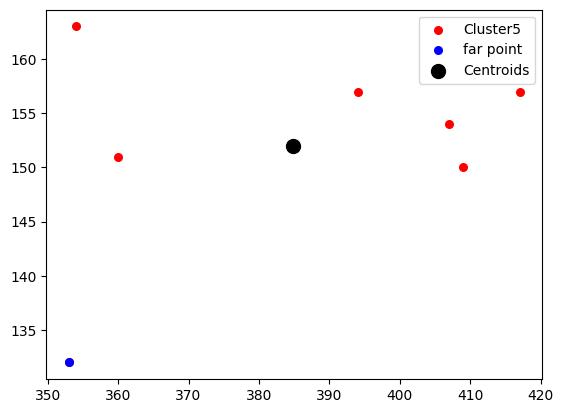

In [14]:
for i in (unique_lb):
    old_max = 0
    for j in range(len(X[y_train==i])):
        new_max = distance(X[y_train==i][j],kmeans.cluster_centers_[i])
        if(new_max > old_max):
            old_max = new_max
            the_point = X[y_train==i][j]

    
    print(the_point)
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], s = 30,c = 'red', label = f'Cluster{i}')
    plt.scatter(the_point[0], the_point[1], s = 30, c = 'blue', label = 'far point')
    
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], s = 100, c = 'black', label = 'Centroids')
    
    plt.legend()
    plt.show()  
    